# Project: Amazon Product & Customer Insights Engine

**Author:** : Nitin Savio Bada





---

## 1. Business Understanding

**Project Goal:** To analyze the Amazon sales dataset to understand product performance and customer feedback. The final objective is to build a system that can recommend products and provide insights from customer reviews.

**Key Questions:**
* What are the top-rated products?
* What are the most common topics or complaints in customer reviews?
* Can we build a system to recommend similar products?
* Can we build a system to recommend products to a specific user?



---

## 2. Data Setup & Loading

This section handles all the necessary setup, including installing libraries, authenticating with Kaggle, and loading the data into a pandas DataFrame.

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import os
import zipfile

print("Libraries imported.")

Libraries imported.


In [ ]:
# 1. Install the kagglehub library
!pip install kagglehub

# 2. Import the library
import kagglehub

# 3. This tells kagglehub where to find your kaggle.json file
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content/"

In [ ]:
# 1. Your code to download the dataset
path = kagglehub.dataset_download("karkavelrajaj/amazon-sales-dataset")
print("Dataset is available at:", path)
# The dataset was downloaded as a directory, so no unzipping is needed.


Using Colab cache for faster access to the 'amazon-sales-dataset' dataset.
Dataset is available at: /kaggle/input/amazon-sales-dataset


### 2.2. Load Data into Pandas
Now that the data is extracted, we load the `amazon.csv` file into a pandas DataFrame, which is the standard tool for data analysis in Python.

In [ ]:
# This is the directory path kagglehub
data_directory = path

# The file 'amazon.csv' is inside that directory
# So we join the two parts to make the full path
file_path = f"{data_directory}/amazon.csv"

# Load the CSV file
df = pd.read_csv(file_path)

# Display the first 5 rows to confirm it loaded correctly
print("Data loaded. Displaying first 5 rows:")
print(df.head())

Data loaded. Displaying first 5 rows:
   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269  

## 3. Data Understanding (Exploratory Data Analysis)

Now that the data is loaded, we will perform an initial "health check." We need to understand the structure of our data, the types of information in each column, and how much data is missing.






### 3.1. Data Structure & Types
We'll use `df.info()` to get a quick summary. This shows:
* The total number of rows (entries).
* The names of all columns.
* The number of non-empty values in each column.
* The data type of each column (e.g., `object` for text, `float64` for numbers with decimals).

In [ ]:
# Get a summary of the DataFrame structure and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

### 3.2. Check for Missing Values
Missing data is a common problem. We need to know where the "holes" are in our dataset before we can analyze it. `df.isnull().sum()` will count the number of empty (NaN) cells for every single column.




In [ ]:
# Count the number of missing (null) values in each column
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


---

## 4. Data Preparation (Cleaning)

Our `df.info()` check showed that several number columns are actually `object` (text) type. We need to clean and convert them one by one.






### 4.1. Clean Price Columns: `discounted_price` & `actual_price`
**Problem:** These columns contain text characters like '₹' (rupee symbol) and ',' (commas).

**Goal:** Remove these characters and convert the columns to numbers.

In [ ]:
# 1. Let's look at the "bad" data first
print("Data BEFORE cleaning:")
print(df[['discounted_price', 'actual_price']].head())
print("--------------------")

# 2. Use .str.replace() to remove the '₹' and ',' characters
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '')
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '')

# 3. Use pd.to_numeric() to convert the cleaned text into actual numbers
df['discounted_price'] = pd.to_numeric(df['discounted_price'])
df['actual_price'] = pd.to_numeric(df['actual_price'])

# 4. Let's look at the "good" data now
print("Data AFTER cleaning:")
print(df[['discounted_price', 'actual_price']].head())

Data BEFORE cleaning:
  discounted_price actual_price
0             ₹399       ₹1,099
1             ₹199         ₹349
2             ₹199       ₹1,899
3             ₹329         ₹699
4             ₹154         ₹399
--------------------
Data AFTER cleaning:
   discounted_price  actual_price
0             399.0        1099.0
1             199.0         349.0
2             199.0        1899.0
3             329.0         699.0
4             154.0         399.0


In [ ]:
# Check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   object 
 6   rating               1465 non-null   object 
 7   rating_count         1463 non-null   object 
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

### 4.2. Clean `discount_percentage` and `rating` Columns

**Problem 1:** The `discount_percentage` column has a '%' sign, making it text.

**Problem 2:** The `rating` column has extra text like " | 1 rating", but we only want the number (e.g., "4.0").

**Goal:** Clean both columns and convert them to numbers.



In [ ]:
# 1. Let's look at the "bad" data
print("Data BEFORE cleaning:")
print(df[['discount_percentage', 'rating']].head())
print("--------------------")

# 2. Clean 'discount_percentage'
# Remove the '%' sign
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '')
# Convert to a number
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'])

# 3. Clean 'rating'
# Split the string at the '|' and keep the first part [0]
# We must use .astype(str) first to make sure .str.split() works
df['rating'] = df['rating'].astype(str).str.split('|').str[0]
# Convert to a number
df['rating'] = pd.to_numeric(df['rating'], errors='coerce') # errors='coerce' is a safety net

# 4. Let's look at the "good" data
print("Data AFTER cleaning:")
print(df[['discount_percentage', 'rating']].head())

Data BEFORE cleaning:
  discount_percentage rating
0                 64%    4.2
1                 43%    4.0
2                 90%    3.9
3                 53%    4.2
4                 61%    4.2
--------------------
Data AFTER cleaning:
   discount_percentage  rating
0                   64     4.2
1                   43     4.0
2                   90     3.9
3                   53     4.2
4                   61     4.2


In [ ]:
# Check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   int64  
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   object 
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

### 4.3. Clean `rating_count` and Handle All Missing Values

**Problem:** `rating_count` is still text (because of commas like '1,234') and has 2 missing values. The `rating` column also has 1 missing value (from our cleaning step).

**Goal:** Convert `rating_count` to a number and then remove all rows that have *any* missing data in our key numeric columns. Since it's only 2-3 rows, this is the safest way to get a perfectly clean dataset for analysis.




In [ ]:
# 1. Let's look at the "bad" data for 'rating_count'
print("Data BEFORE cleaning 'rating_count':")
print(df['rating_count'].head())
print("--------------------")

# 2. Clean 'rating_count'
# Remove the ',' (commas)
# We must use .astype(str) first in case pandas hasn't read it as a string
df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '')
# Convert to a number, coercing errors to NaN
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# 3. Handle ALL missing values
# Let's check how many missing values we have *before* dropping
print("Missing values BEFORE dropping:")
print(df[['rating', 'rating_count']].isnull().sum())
print("--------------------")

# 4. Drop rows where 'rating' OR 'rating_count' is missing
df.dropna(subset=['rating', 'rating_count'], inplace=True)

# 5. Let's check *after* dropping
print("Missing values AFTER dropping:")
print(df[['rating', 'rating_count']].isnull().sum())

Data BEFORE cleaning 'rating_count':
0    24,269
1    43,994
2     7,928
3    94,363
4    16,905
Name: rating_count, dtype: object
--------------------
Missing values BEFORE dropping:
rating          1
rating_count    2
dtype: int64
--------------------
Missing values AFTER dropping:
rating          0
rating_count    0
dtype: int64


In [ ]:
# FINAL HEALTH CHECK
print("Final Data Types and Non-Null Counts:")
df.info()

Final Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1462 non-null   object 
 1   product_name         1462 non-null   object 
 2   category             1462 non-null   object 
 3   discounted_price     1462 non-null   float64
 4   actual_price         1462 non-null   float64
 5   discount_percentage  1462 non-null   int64  
 6   rating               1462 non-null   float64
 7   rating_count         1462 non-null   float64
 8   about_product        1462 non-null   object 
 9   user_id              1462 non-null   object 
 10  user_name            1462 non-null   object 
 11  review_id            1462 non-null   object 
 12  review_title         1462 non-null   object 
 13  review_content       1462 non-null   object 
 14  img_link             1462 non-null   object 
 15  produ

---

## 5. Exploratory Data Analysis (EDA)

Our data is now clean! We can finally perform calculations and ask business questions. Let's find out...





### 5.1. What are the top 10 most expensive products?
We can find this by sorting our table by the `actual_price` column, from highest to lowest.

In [ ]:
# Sort the DataFrame by 'actual_price' in descending (highest to lowest) order
# We use .head(10) to just see the top 10
# We also select just the 'product_name' and 'actual_price' to keep the table simple

top_10_expensive = df.sort_values(by='actual_price', ascending=False)
print("--- Top 10 Most Expensive Products ---")
print(top_10_expensive[['product_name', 'actual_price']].head(10))

--- Top 10 Most Expensive Products ---
                                           product_name  actual_price
249   Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...      139900.0
255   VU 164 cm (65 inches) The GloLED Series 4K Sma...       85000.0
283   LG 139 cm (55 inches) 4K Ultra HD Smart LED TV...       79990.0
1354  LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...       75990.0
568   Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...       74999.0
192   Samsung 138 cm (55 inches) Crystal 4K Neo Seri...       70900.0
332   MI 138.8 cm (55 inches) 5X Series 4K Ultra HD ...       69999.0
325   OnePlus 163.8 cm (65 inches) U Series 4K LED S...       69999.0
276   Samsung 138 cm (55 inches) Crystal 4K Series U...       69900.0
108   VU 139 cm (55 inches) The GloLED Series 4K Sma...       65000.0


### 5.2. What are the top 10 highest-rated products?
**Important:** A product with a 5.0 rating but only 1 review isn't as reliable as one with a 4.9 rating and 10,000 reviews. For now, let's just sort by `rating`, but we'll keep `rating_count` in view.




In [ ]:
# Sort by 'rating' (highest to lowest)
top_10_rated = df.sort_values(by='rating', ascending=False)
print("\n--- Top 10 Highest Rated Products ---")
print(top_10_rated[['product_name', 'rating', 'rating_count']].head(10))


--- Top 10 Highest Rated Products ---
                                           product_name  rating  rating_count
775   Amazon Basics Wireless Mouse | 2.4 GHz Connect...     5.0          23.0
174   Syncwire LTG to USB Cable for Fast Charging Co...     5.0           5.0
1145  Swiffer Instant Electric Water Heater Faucet T...     4.8       53803.0
1201  Oratech Coffee Frother electric, milk frother ...     4.8          28.0
1299  Instant Pot Air Fryer, Vortex 2QT, Touch Contr...     4.8        3964.0
1226  Zuvexa USB Rechargeable Electric Foam Maker - ...     4.7          54.0
1275  Multifunctional 2 in 1 Electric Egg Boiling St...     4.7        2300.0
459   Spigen EZ Fit Tempered Glass Screen Protector ...     4.7        7779.0
1223  FIGMENT Handheld Milk Frother Rechargeable, 3-...     4.7        1729.0
249   Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...     4.7        5935.0


### 5.3. What are the top 10 most reviewed products?
These are the products with the most *engagement*. This is often more important to a business than just the rating.



In [ ]:
# Sort by 'rating_count' (highest to lowest)
top_10_reviewed = df.sort_values(by='rating_count', ascending=False)
print("\n--- Top 10 Most Reviewed Products ---")
print(top_10_reviewed[['product_name', 'rating', 'rating_count']].head(10))


--- Top 10 Most Reviewed Products ---
                                          product_name  rating  rating_count
47   Amazon Basics High-Speed HDMI Cable, 6 Feet - ...     4.4      426973.0
65   Amazon Basics High-Speed HDMI Cable, 6 Feet (2...     4.4      426973.0
12   AmazonBasics Flexible Premium HDMI Cable (Blac...     4.4      426973.0
684  AmazonBasics Flexible Premium HDMI Cable (Blac...     4.4      426972.0
400  boAt Bassheads 100 in Ear Wired Earphones with...     4.1      363713.0
352  boAt Bassheads 100 in Ear Wired Earphones with...     4.1      363713.0
584  boAt BassHeads 100 in-Ear Wired Headphones wit...     4.1      363711.0
370  Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...     4.1      313836.0
371  Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...     4.1      313836.0
566  Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...     4.1      313832.0


**What our Results Are Telling**

  * Top Highest Rated: The 5.0-star products have only 23 and 5 reviews. But the "Swiffer" with a 4.8-star rating has over 53,000 reviews. A manager would find the Swiffer much more interesting. This tells you that "rating" alone isn't enough; you need "rating" + "rating_count" to find true, reliable "best" products.

  * Top Most Reviewed: You see "Amazon Basics HDMI" and "boAt Bassheads" listed 3 times each! This is a powerful insight. It tells you that these aren't just single popular products; they are a popular product line, but they are clogging up our "Top 10" list.

### 5.4. What are the most common product categories?
Now that we've looked at individual products, let's zoom out to see the big picture. Which categories have the most products listed in our dataset?

We'll use `.value_counts()` to count the number of times each category name appears.


In [ ]:
# Get the top 10 most common categories
top_10_categories = df['category'].value_counts()
print("--- Top 10 Most Common Categories (by product count) ---")
print(top_10_categories.head(10))

--- Top 10 Most Common Categories (by product count) ---
category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables                        231
Electronics|WearableTechnology|SmartWatches                                                               76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                                      68
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                                             63
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                                              52
Electronics|HomeTheater,TV&Video|Accessories|RemoteControls                                               49
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|MixerGrinders                                  27
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice                            24
Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables

### 5.5. Which categories are the "best"?
This is a more advanced question. We can't just sort by category. We need to:
1.  **Group** all products that share the same category.
2.  Calculate the **average rating** for that entire group.
3.  Calculate the **total (sum) of all reviews** for that entire group.

This is what `groupby()` is for. It's one of the most powerful tools in pandas.



In [ ]:
# We will .groupby() the 'category' column
# Then, we'll calculate the 'mean' of the 'rating' column
# and the 'sum' of the 'rating_count' column for each category
category_stats = df.groupby('category').agg(
    Average_Rating=('rating', 'mean'),
    Total_Reviews=('rating_count', 'sum')
)

# Let's see the results
print("--- Category Analysis (Top 5) ---")
print(category_stats.head())

--- Category Analysis (Top 5) ---
                                                    Average_Rating  \
category                                                             
Car&Motorbike|CarAccessories|InteriorAccessorie...            3.80   
Computers&Accessories|Accessories&Peripherals|A...            4.15   
Computers&Accessories|Accessories&Peripherals|A...            3.50   
Computers&Accessories|Accessories&Peripherals|A...            3.60   
Computers&Accessories|Accessories&Peripherals|A...            4.05   

                                                    Total_Reviews  
category                                                           
Car&Motorbike|CarAccessories|InteriorAccessorie...         1118.0  
Computers&Accessories|Accessories&Peripherals|A...         5966.0  
Computers&Accessories|Accessories&Peripherals|A...         7222.0  
Computers&Accessories|Accessories&Peripherals|A...        17773.0  
Computers&Accessories|Accessories&Peripherals|A...        12547.0  

### 5.6. Which categories have the highest average rating?
Now we can just sort our new `category_stats` table.


In [ ]:
# Sort by 'Average_Rating' (highest to lowest)
top_rated_categories = category_stats.sort_values(by='Average_Rating', ascending=False)
print("--- Top 10 Highest Rated Categories ---")
print(top_rated_categories.head(10))

--- Top 10 Highest Rated Categories ---
                                                    Average_Rating  \
category                                                             
Computers&Accessories|Tablets                                  4.6   
Computers&Accessories|NetworkingDevices|Network...             4.5   
Electronics|Cameras&Photography|Accessories|Film               4.5   
Computers&Accessories|Components|Memory                        4.5   
Electronics|HomeAudio|MediaStreamingDevices|Str...             4.5   
OfficeProducts|OfficeElectronics|Calculators|Basic             4.5   
HomeImprovement|Electrical|CordManagement                      4.5   
Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea&...             4.5   
Home&Kitchen|Kitchen&HomeAppliances|SmallKitche...             4.5   
Electronics|PowerAccessories|SurgeProtectors                   4.5   

                                                    Total_Reviews  
category                                           

### 5.7. Which categories have the most total reviews?
This shows which parts of the store get the most customer engagement.


In [ ]:
# Sort by 'Total_Reviews' (highest to lowest)
most_reviewed_categories = category_stats.sort_values(by='Total_Reviews', ascending=False)
print("--- Top 10 Most Reviewed Categories ---")
print(most_reviewed_categories.head(10))

--- Top 10 Most Reviewed Categories ---
                                                    Average_Rating  \
category                                                             
Electronics|Headphones,Earbuds&Accessories|Head...        3.898077   
Computers&Accessories|Accessories&Peripherals|C...        4.153247   
Electronics|Mobiles&Accessories|Smartphones&Bas...        4.100000   
Electronics|HomeTheater,TV&Video|Accessories|Ca...        4.254167   
Electronics|WearableTechnology|SmartWatches               4.025000   
Electronics|Accessories|MemoryCards|MicroSD               4.330769   
Computers&Accessories|ExternalDevices&DataStora...        4.260000   
Electronics|HomeTheater,TV&Video|Televisions|Sm...        4.209524   
Computers&Accessories|NetworkingDevices|Network...        4.094444   
Electronics|Mobiles&Accessories|MobileAccessori...        4.125000   

                                                    Total_Reviews  
category                                           

---

## 6. Feature Engineering (Cleaning the Category Column)

Our analysis in Step 5 showed that the `category` column is too specific. The long paths (like 'Electronics|Headphones|...') are not useful for a high-level summary.

**Goal:** Create a new column called `parent_category` that only contains the *first* part of the string (e.g., "Electronics", "Computers&Accessories", "Home&Kitchen").

This is a common task called **Feature Engineering**, where we create a new, more useful feature from existing data.


In [ ]:
# 1. We will split the 'category' string at the first '|' symbol
# 2. Then, we will take just the first part (which is index [0])
# 3. We store this in a new column called 'parent_category'

df['parent_category'] = df['category'].str.split('|').str[0]

# Now, let's look at the new column right next to the old one to see if it worked.
print("--- New 'parent_category' column created ---")
print(df[['category', 'parent_category']].head())

--- New 'parent_category' column created ---
                                            category        parent_category
0  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories
1  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories
2  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories
3  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories
4  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories


### 6.1. Re-analyze Category Counts
Now that we have our clean `parent_category` column, let's count how many products are in each. This will be much more useful than our previous count in Step 5.4.



In [ ]:
# Count the number of times each 'parent_category' appears
# We use .value_counts() again, but on our new column
# We use .head(10) to see just the top 10
print("--- Top 10 Parent Categories (by product count) ---")
print(df['parent_category'].value_counts().head(10))

--- Top 10 Parent Categories (by product count) ---
parent_category
Electronics              526
Computers&Accessories    451
Home&Kitchen             447
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: count, dtype: int64


Previous list was a mess of long, confusing text. This output is clean, simple, and gives you a powerful insight: Electronics, Computers&Accessories, and Home&Kitchen are the three biggest categories in your dataset by far.

Now we can do our final and most important analysis. We will use groupby() on this clean parent_category column. This will tell us, out of these big categories, which ones have the most total reviews and the best average rating.

### 6.2. Final Category Analysis: Performance & Engagement

We now have our clean `parent_category` column. Let's use `groupby()` on this new column to get our final, high-level business summary.

We want to know two things for each category:
1.  What is its **average rating**? (Tells us about quality)
2.  What is its **total number of reviews**? (Tells us about engagement)



In [ ]:
# 1. Group by our new 'parent_category' column
# 2. For each group, calculate:
#    - The 'mean' (average) of the 'rating' column
#    - The 'sum' (total) of the 'rating_count' column
parent_category_stats = df.groupby('parent_category').agg(
    Average_Rating=('rating', 'mean'),
    Total_Reviews=('rating_count', 'sum')
)

# 3. Let's see the result.
print("--- Final Category Performance ---")
print(parent_category_stats)

--- Final Category Performance ---
                       Average_Rating  Total_Reviews
parent_category                                     
Car&Motorbike                3.800000         1118.0
Computers&Accessories        4.155654      7728689.0
Electronics                  4.081749     15778848.0
Health&PersonalCare          4.000000         3663.0
Home&Kitchen                 4.040716      2990077.0
HomeImprovement              4.250000         8566.0
MusicalInstruments           3.900000        88882.0
OfficeProducts               4.309677       149675.0
Toys&Games                   4.300000        15867.0


### 6.3. Sort by Most Popular (Total Reviews)
Now that we have our `parent_category_stats` table, let's sort it by `Total_Reviews` to see which categories are the most popular and have the most customer engagement.


In [ ]:
# Sort our new table by the 'Total_Reviews' column
# We set ascending=False to get the highest numbers on top
popular_categories = parent_category_stats.sort_values(by='Total_Reviews', ascending=False)

print("--- Most Popular Categories (by Total Reviews) ---")
print(popular_categories.head(10))

--- Most Popular Categories (by Total Reviews) ---
                       Average_Rating  Total_Reviews
parent_category                                     
Electronics                  4.081749     15778848.0
Computers&Accessories        4.155654      7728689.0
Home&Kitchen                 4.040716      2990077.0
OfficeProducts               4.309677       149675.0
MusicalInstruments           3.900000        88882.0
Toys&Games                   4.300000        15867.0
HomeImprovement              4.250000         8566.0
Health&PersonalCare          4.000000         3663.0
Car&Motorbike                3.800000         1118.0


### 6.4. Sort by Highest Quality (Average Rating)
This will show us which categories have the happiest customers, even if they don't have millions of reviews.


In [ ]:
# Sort our 'parent_category_stats' table by the 'Average_Rating' column
# We set ascending=False to get the highest ratings on top
highest_rated_categories = parent_category_stats.sort_values(by='Average_Rating', ascending=False)

print("--- Highest-Rated Categories (by Average Rating) ---")
print(highest_rated_categories.head(10))

--- Highest-Rated Categories (by Average Rating) ---
                       Average_Rating  Total_Reviews
parent_category                                     
OfficeProducts               4.309677       149675.0
Toys&Games                   4.300000        15867.0
HomeImprovement              4.250000         8566.0
Computers&Accessories        4.155654      7728689.0
Electronics                  4.081749     15778848.0
Home&Kitchen                 4.040716      2990077.0
Health&PersonalCare          4.000000         3663.0
MusicalInstruments           3.900000        88882.0
Car&Motorbike                3.800000         1118.0


---

## 7. Natural Language Processing (NLP) - Text Analysis

We have completed our analysis of the *numeric* data. Now, we will analyze the *text* data to understand customer sentiment.




### 7.1. Select a Product to Analyze

Before we can analyze thousands of reviews, let's just pick **one** product to focus on.

From our earlier analysis in Step 5.3 ("Top 10 Most Reviewed Products"), we saw that the "Amazon Basics High-Speed HDMI Cable" was one of the most popular. It was at index `47`. Let's find its `product_id` so we can isolate its reviews.

In [ ]:
# 1. Let's find the 'product_id' of the product at original index 47
# We use .loc[47] to find the row that had the label '47' in the *original* file
product_id_to_check = df.loc[47]['product_id']

# 2. Print this ID so we know what it is
print(f"The product_id we will check is: {product_id_to_check}")

The product_id we will check is: B014I8SSD0


### 7.2. Filter Reviews for a Single Product

Now that we have our `product_id_to_check`, let's create a new, smaller DataFrame that *only* contains rows where the `product_id` column matches this ID.

This will give us a table of reviews for just this one HDMI cable.



In [ ]:
# 1. Create a new DataFrame called 'product_reviews'
# It will only include rows where 'product_id' is equal to 'product_id_to_check'
product_reviews = df[df['product_id'] == product_id_to_check]

# 2. Let's look at the first 5 rows of our *new* table
# This will show us all the columns (rating, review_title, etc.) for this one product
print("--- First 5 rows of our new 'product_reviews' table ---")
print(product_reviews.head())

--- First 5 rows of our new 'product_reviews' table ---
    product_id                                       product_name  \
47  B014I8SSD0  Amazon Basics High-Speed HDMI Cable, 6 Feet - ...   

                                             category  discounted_price  \
47  Electronics|HomeTheater,TV&Video|Accessories|C...             309.0   

    actual_price  discount_percentage  rating  rating_count  \
47         475.0                   35     4.4      426973.0   

                                        about_product  \
47  Please select appropriate display resolution &...   

                                              user_id  \
47  AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTI...   

                                            user_name  \
47  Rishav Gossain,Shashank Mallamraju,Purnendu,gu...   

                                            review_id  \
47  R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3...   

                                         review_title  \
47  It's q

### 7.3. Inspect the Raw Review Text

Now let's just print the `review_content` from our new table. This is the text we will be analyzing.


In [ ]:
# From our 'product_reviews' table, select *only* the 'review_content' column.
# Then, show the first 5 entries.
print("--- First 5 Raw Review Texts ---")
print(product_reviews['review_content'].head())

# Let's also print one *full* review to see what it looks like
print("\n--- A Single Full Review ---")
print(product_reviews['review_content'].iloc[0])

--- First 5 Raw Review Texts ---
47    I am using it for 14 days now. The experience ...
Name: review_content, dtype: object

--- A Single Full Review ---
I am using it for 14 days now. The experience is pretty good as of now. Picture quality is also not bad. Don't expect something out of the world at this price point. But you can go for it if you have a tight budget.,Initial impressions: works as said, glad I didn’t go for cheaper options (not that it’s too costly) just plug and play. Will update if it screws up,The hdmi cable is good to watch movie,sports and its gives better quality while connecting your laptop with TV and play 🎮.I loved it,Works as expected. Length of the cable is short and it was mentioned also satisfied my requirement. If you need more length better look other options.,All good,It's the best HDMI cable at this price range. No problems yet. Just go for it !!,I was expecting this to be delivered on time and it was delivered on time.Product is good as i have tried o

This is exactly what we needed to see. Our "NLP To-Do List":

1. Capital Letters: There are capital letters ("I", "The", "Works") that we need to standardize.

2. Punctuation: There are periods (.), commas (,), and exclamation marks (!!) that we need to remove.

3. Emojis: There's even an emoji (🎮)!

4. Stopwords: The text is full of common words like "I", "am", "it", "for", "is", "the", which don't add much meaning.

Before we can analyze this, we must clean it. We will write a function to do this, and we'll build it one small step at a time.

The very first step of text cleaning is to make everything uniform. The easiest win is to make all text lowercase.

### 7.4. Text Cleaning: Step 1 (Lowercase)

Our raw text is messy. Before we can analyze it, we must clean it. We will build a text-cleaning process step-by-step.

**First step:** Convert all text to lowercase. This ensures that "Good" and "good" are treated as the same word.

Let's grab the raw text from that one cell and practice on it.


In [ ]:
# 1. Get the single block of raw text from our product_reviews table
raw_text = product_reviews['review_content'].iloc[0]

# 2. Let's look at the first 100 characters of the *original* text
print("--- ORIGINAL TEXT (First 100 chars) ---")
print(raw_text[0:100])
print("\n")

# 3. Convert the text to lowercase
lowercase_text = raw_text.lower()

# 4. Let's look at the first 100 characters of the *cleaned* text
print("--- LOWERCASE TEXT (First 100 chars) ---")
print(lowercase_text[0:100])

--- ORIGINAL TEXT (First 100 chars) ---
I am using it for 14 days now. The experience is pretty good as of now. Picture quality is also not 


--- LOWERCASE TEXT (First 100 chars) ---
i am using it for 14 days now. the experience is pretty good as of now. picture quality is also not 


Successfully handled the first part of text cleaning. "I am" and "i am" are now identical.

The next problem in our text is all the "noise": punctuation (., ,, !) and numbers (14). These don't tell us about sentiment (whether the review is good or bad), so we should remove them.

We'll use a powerful Python tool called regular expressions (or re) to do this.

### 7.5. Text Cleaning: Step 2 (Remove Punctuation & Numbers)

Now that our text is all lowercase, let's remove everything that isn't a letter. We'll use the `re` library to create a rule: "find anything that is *not* a standard `a-z` letter or a space, and replace it with an empty space."


In [ ]:
# 1. Import the 're' (regular expressions) library
import re

# 2. 'lowercase_text' is the variable we created in the last step
#    Let's look at it again (first 100 chars)
print("--- BEFORE (lowercase text) ---")
print(lowercase_text[0:100])
print("\n")

# 3. Create the rule to remove non-letters and numbers
# [^a-z\s] means "anything that is NOT (^) a letter from a-z or a space (\s)"
letters_only_text = re.sub(r'[^a-z\s]', '', lowercase_text)

# 4. Let's look at the result
print("--- AFTER (letters only text) ---")
print(letters_only_text[0:100])

--- BEFORE (lowercase text) ---
i am using it for 14 days now. the experience is pretty good as of now. picture quality is also not 


--- AFTER (letters only text) ---
i am using it for  days now the experience is pretty good as of now picture quality is also not bad 


Output shows exactly what we wanted:

* i am using it for 14 days now. the... (BEFORE)

* i am using it for days now the... (AFTER)

The punctuation (.) and the number (14) are both gone.

Now, look at the "AFTER" text. It's still full of "filler" words like i, am, it, for, the, as, of. These words are called stopwords because they don't carry much meaning about sentiment. We need to remove them.

To do this, we'll use a standard list of stopwords from a very popular NLP library called NLTK (Natural Language Toolkit).

### 7.6. Text Cleaning: Step 3 (Remove Stopwords)

Our text is now just lowercase letters and spaces. The next step is to remove common "filler" words (stopwords) like 'i', 'me', 'my', 'the', 'and', 'a', etc.

We will use the standard list of English stopwords from the `nltk` library.



In [ ]:
# 1. We need to download the stopwords list from NLTK first
# We also need to install the library
!pip install nltk
import nltk
nltk.download('stopwords')

# 2. Import the stopwords list
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# 3. 'letters_only_text' is our variable from the last step
#    Let's look at it again
print("--- BEFORE (letters only) ---")
print(letters_only_text)
print("\n")

# 4. We need to split the long string into a list of individual words
words = letters_only_text.split()

# 5. Now, we create a *new* list, only keeping words that are NOT in 'stop_words'
cleaned_words = [word for word in words if not word in stop_words]

# 6. Finally, let's join the 'cleaned_words' back into a single string
cleaned_text = ' '.join(cleaned_words)

# 7. Let's look at the final, fully cleaned text
print("--- AFTER (no stopwords) ---")
print(cleaned_text)

--- BEFORE (letters only) ---
i am using it for  days now the experience is pretty good as of now picture quality is also not bad dont expect something out of the world at this price point but you can go for it if you have a tight budgetinitial impressions works as said glad i didnt go for cheaper options not that its too costly just plug and play will update if it screws upthe hdmi cable is good to watch moviesports and its gives better quality while connecting your laptop with tv and play i loved itworks as expected length of the cable is short and it was mentioned also satisfied my requirement if you need more length better look other optionsall goodits the best hdmi cable at this price range no problems yet just go for it i was expecting this to be delivered on time and it was delivered on timeproduct is good as i have tried other cables and wires from amazon basica brandgood one


--- AFTER (no stopwords) ---
using days experience pretty good picture quality also bad dont expect s

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


That output is perfect!

Look at the "AFTER" text. It's much cleaner and only contains the words that carry real meaning, like: using days experience pretty good picture quality also bad

We have successfully built all the individual pieces of your text cleaner. Now, let's put them all together into one single, reusable function.

This is a very important step. Instead of copying and pasting those three cleaning steps every time, we can now create a "cleaning machine" (a function) that takes in any raw text and gives us back the clean text.

### 7.7. Text Cleaning: Step 4 (Create a Reusable Function)

We have successfully built and tested the 3 steps for cleaning our text:
1.  Convert to lowercase
2.  Remove punctuation & numbers
3.  Remove stopwords

Now, let's combine these into a single Python function called `clean_text()`. This will let us clean *all* our reviews easily.



In [ ]:
# We've already imported 're' and 'stopwords'
import re
from nltk.corpus import stopwords

# Get the set of English stopwords
stop_words = set(stopwords.words('english'))

# Define our cleaning function
def clean_text(text):
    # 1. Convert to lowercase
    text = text.lower()

    # 2. Remove punctuation, numbers, and emojis
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. Split into words
    words = text.split()

    # 4. Remove stopwords
    cleaned_words = [word for word in words if not word in stop_words]

    # 5. Join words back into a single string
    cleaned_text = ' '.join(cleaned_words)

    return cleaned_text

# --- Let's test our new function ---

# 1. Get our original raw text again
raw_text = product_reviews['review_content'].iloc[0]
print("--- RAW TEXT ---")
print(raw_text)
print("\n")

# 2. Use our *new function* to clean it
function_cleaned_text = clean_text(raw_text)
print("--- FUNCTION CLEANED TEXT ---")
print(function_cleaned_text)

--- RAW TEXT ---
I am using it for 14 days now. The experience is pretty good as of now. Picture quality is also not bad. Don't expect something out of the world at this price point. But you can go for it if you have a tight budget.,Initial impressions: works as said, glad I didn’t go for cheaper options (not that it’s too costly) just plug and play. Will update if it screws up,The hdmi cable is good to watch movie,sports and its gives better quality while connecting your laptop with TV and play 🎮.I loved it,Works as expected. Length of the cable is short and it was mentioned also satisfied my requirement. If you need more length better look other options.,All good,It's the best HDMI cable at this price range. No problems yet. Just go for it !!,I was expecting this to be delivered on time and it was delivered on time.Product is good as i have tried other cables and wires from Amazon basica brand.,Good one


--- FUNCTION CLEANED TEXT ---
using days experience pretty good picture quality

### 7.8. Apply the Cleaning Function

We have a working function. Now, let's "apply" it to every row in the `review_content` column of our small `product_reviews` table.

We will store this new clean text in a new column called `cleaned_review`.



In [ ]:
# 1. Apply our 'clean_text' function to the 'review_content' column.
#    .apply() runs the function on every single row.
#    We store the result in a new 'cleaned_review' column.
product_reviews['cleaned_review'] = product_reviews['review_content'].apply(clean_text)

# 2. Let's look at the result!
#    We'll print the original 'review_content' and our new 'cleaned_review' side-by-side
#    to see the "before" and "after".
print("--- 'Before' and 'After' Cleaning ---")
print(product_reviews[['review_content', 'cleaned_review']].head())

--- 'Before' and 'After' Cleaning ---
                                       review_content  \
47  I am using it for 14 days now. The experience ...   

                                       cleaned_review  
47  using days experience pretty good picture qual...  


/tmp/ipython-input-684049983.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_reviews['cleaned_review'] = product_reviews['review_content'].apply(clean_text)


We have successfully prepared your text for analysis. We now have a cleaned_review column that's just the meaningful words.

So, what can we do with it? A great first step is to visualize the most common words. We'll make a Word Cloud, which is a classic NLP visualization. The most frequent words will appear bigger.

### 7.9. Visualize the Cleaned Text (Word Cloud)

We have a new `cleaned_review` column. Let's find out which words are the most common in these reviews. A Word Cloud is a perfect way to see this.

We'll need to install a new library called `wordcloud`.


--- Most Common Words in Product Reviews ---


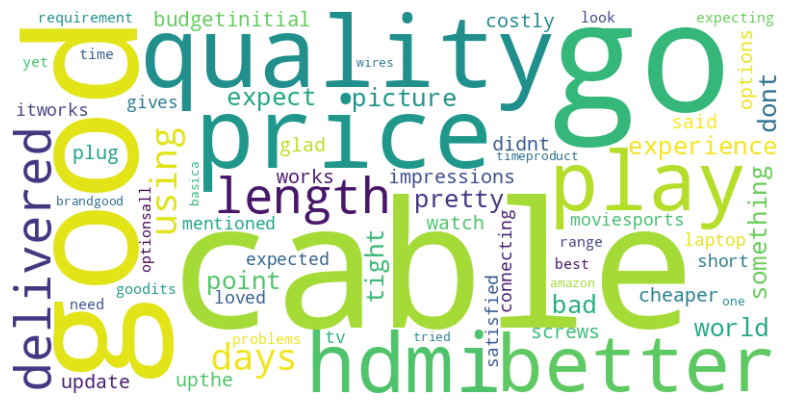

In [ ]:
# 1. Install the wordcloud library
!pip install wordcloud

# 2. Import the libraries we need
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 3. Join all the *cleaned* reviews into one giant string of text
# (Our 'product_reviews' table only has one product, but this is the right way to do it)
all_reviews_text = ' '.join(product_reviews['cleaned_review'])

# 4. Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_text)

# 5. Display the Word Cloud using matplotlib
print("--- Most Common Words in Product Reviews ---")
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the x and y axes
plt.show()

This is a fantastic insight, but it has one limitation: it doesn't tell us the feeling or sentiment. "Good" is obviously positive, but what about "cable" or "length"? Are people happy or unhappy about them?

Our next step is to figure this out. We will use a powerful tool called VADER (a pre-built sentiment analyzer) to score each review as positive, negative, or neutral.

---

## 8. Sentiment Analysis

Our Word Cloud shows *what* people talk about. Now, we will find out *how* they feel. We will use a pre-trained sentiment analysis tool called `vaderSentiment`.




### 8.1. Install and Initialize VADER
First, we need to install the library and create the "analyzer" object. This object is the tool that will do the scoring for us.

In [ ]:
# 1. Install the vaderSentiment library
!pip install vaderSentiment

# 2. Import the main tool
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# 3. Create our analyzer object
analyzer = SentimentIntensityAnalyzer()

print("VADER analyzer is ready to use.")

VADER analyzer is ready to use.


### 8.2. Test VADER on a Positive Sentence

Let's see how our `analyzer` scores a positive sentence. The most important score to watch is the `compound` score, which ranges from -1 (most negative) to +1 (most positive).



In [ ]:
# 1. A simple, positive test sentence
test_sentence = "This is a great product, I love it!"

# 2. Use the analyzer to get the polarity scores
score = analyzer.polarity_scores(test_sentence)

# 3. Print the sentence and its score
print(f"SENTENCE: {test_sentence}")
print(f"SCORE: {score}")

SENTENCE: This is a great product, I love it!
SCORE: {'neg': 0.0, 'neu': 0.411, 'pos': 0.589, 'compound': 0.8622}


### 8.3. Test VADER on a Negative Sentence

Now let's give it a clearly negative review and check the scores. We expect the `neg` and `compound` scores to be high (or high-negative for compound).


In [ ]:
# 1. A simple, negative test sentence
test_sentence = "This is a terrible product, it broke."

# 2. Use the analyzer to get the polarity scores
score = analyzer.polarity_scores(test_sentence)

# 3. Print the sentence and its score
print(f"SENTENCE: {test_sentence}")
print(f"SCORE: {score}")

SENTENCE: This is a terrible product, it broke.
SCORE: {'neg': 0.541, 'neu': 0.459, 'pos': 0.0, 'compound': -0.7096}


### 8.4. Apply VADER to Our Product Reviews

We've tested our `analyzer` and it works. Now, let's use it to score the reviews for our HDMI cable.

We will apply the `analyzer.polarity_scores` function to the **original `review_content`** column.

**Note:** It's important to use the *original* raw text (`review_content`) for VADER, not our `cleaned_review`. VADER is smart and uses punctuation (like `!!`) and capital letters (like `LOVE`) to help it score, so we want to give it the original text.


In [ ]:
# 1. Apply the analyzer to the 'review_content' column
# This creates a new column where each row contains the score dictionary
product_reviews['sentiment_scores'] = product_reviews['review_content'].apply(
    lambda text: analyzer.polarity_scores(text)
)

# 2. Let's look at our table now
# It should have a new 'sentiment_scores' column
print("--- Reviews with Sentiment Scores ---")
print(product_reviews[['review_content', 'sentiment_scores']].head())

--- Reviews with Sentiment Scores ---
                                       review_content  \
47  I am using it for 14 days now. The experience ...   

                                     sentiment_scores  
47  {'neg': 0.02, 'neu': 0.716, 'pos': 0.265, 'com...  


/tmp/ipython-input-2919963595.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_reviews['sentiment_scores'] = product_reviews['review_content'].apply(


### 8.5. Extract the 'Compound' Score

The `sentiment_scores` column is a dictionary. Let's extract the `compound` score from it into a new, clean column called `compound_score`. This will give us a single number for each review.



In [ ]:
# 1. 'product_reviews['sentiment_scores']' is our column of dictionaries.
#    .apply(lambda x: x['compound']) means "for each dictionary (x), get the value for the 'compound' key".
product_reviews['compound_score'] = product_reviews['sentiment_scores'].apply(
    lambda score_dict: score_dict['compound']
)

# 2. Let's look at the result!
#    We'll show the review, the full score dictionary, and our new clean score.
print("--- 'Compound' Score Extracted ---")
print(product_reviews[['review_content', 'sentiment_scores', 'compound_score']].head())

--- 'Compound' Score Extracted ---
                                       review_content  \
47  I am using it for 14 days now. The experience ...   

                                     sentiment_scores  compound_score  
47  {'neg': 0.02, 'neu': 0.716, 'pos': 0.265, 'com...          0.9945  


/tmp/ipython-input-3372720944.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_reviews['compound_score'] = product_reviews['sentiment_scores'].apply(


That's exactly what we wanted. Now we have a clean, single number for each review that tells you its overall sentiment (e.g., 0.9945 is very positive).

Now, let's make this even easier to read. A manager doesn't want to see 0.9945. They want to see the word: "Positive".

We'll create one last column by setting some simple rules:

* If the score is high (e.g., > 0.05), label it "Positive".

* If the score is low (e.g., < -0.05), label it "Negative".

* If it's in the middle, label it "Neutral".

### 8.6. Classify Sentiment as Positive, Negative, or Neutral

We have our `compound_score` number. Now, let's create a final `sentiment_label` column that has a simple text label.

We will write a function to do this classification.


In [ ]:
# 1. Define a function to classify the sentiment
def classify_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# 2. Apply this new function to our 'compound_score' column
product_reviews['sentiment_label'] = product_reviews['compound_score'].apply(classify_sentiment)

# 3. Let's look at the final result!
#    We'll show the score and the new label side-by-side.
print("--- Final Sentiment Labels ---")
print(product_reviews[['compound_score', 'sentiment_label']].head())

--- Final Sentiment Labels ---
    compound_score sentiment_label
47          0.9945        Positive


/tmp/ipython-input-3471908149.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_reviews['sentiment_label'] = product_reviews['compound_score'].apply(classify_sentiment)


### 8.7. Final Sentiment Tally

We have labeled every review for this product. Now, let's count how many fall into each category. This will give us our final sentiment summary for this product.



In [ ]:
# 1. Use .value_counts() on our new 'sentiment_label' column
#    This will count the unique entries (Positive, Negative, Neutral)
sentiment_summary = product_reviews['sentiment_label'].value_counts()

print("--- Overall Sentiment Summary for this Product ---")
print(sentiment_summary)

--- Overall Sentiment Summary for this Product ---
sentiment_label
Positive    1
Name: count, dtype: int64


---

## 9. Full Dataset Sentiment Analysis

We have successfully built and tested our sentiment analysis pipeline on a single review. Now, let's apply it to the **entire `df` DataFrame** to understand the sentiment of all 1,462 reviews.




### 9.1. Apply VADER to All Reviews
Our `analyzer` tool is still in memory. Let's apply it to the `review_content` column of our main `df`.

In [ ]:
# 1. Apply the analyzer to the 'review_content' column of the main 'df'
#    (We don't need the 'product_reviews' table anymore)
#    This will create a new 'sentiment_scores' column.
#    We use str(text) to be safe, in case there are any non-string values.
df['sentiment_scores'] = df['review_content'].apply(
    lambda text: analyzer.polarity_scores(str(text))
)

# 2. Let's look at the result on our main DataFrame
print("--- Main 'df' with Sentiment Scores ---")
print(df[['review_content', 'sentiment_scores']].head())

--- Main 'df' with Sentiment Scores ---
                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                    sentiment_scores  
0  {'neg': 0.031, 'neu': 0.754, 'pos': 0.215, 'co...  
1  {'neg': 0.01, 'neu': 0.83, 'pos': 0.16, 'compo...  
2  {'neg': 0.0, 'neu': 0.651, 'pos': 0.349, 'comp...  
3  {'neg': 0.027, 'neu': 0.807, 'pos': 0.165, 'co...  
4  {'neg': 0.084, 'neu': 0.725, 'pos': 0.191, 'co...  


Just like before, that sentiment_scores column is a dictionary, and it's hard to work with. The next small step is to pull just the compound score out into its own, clean column in our main df.

### 9.2. Extract 'Compound' Score for All Reviews

Now we'll extract the `compound` score from the `sentiment_scores` dictionary for every row. This will give us a single, clean number for each review.


In [ ]:
# 1. Apply a lambda function to get the 'compound' value from each dictionary
df['compound_score'] = df['sentiment_scores'].apply(
    lambda score_dict: score_dict['compound']
)

# 2. Let's look at the result!
#    We'll show the new 'compound_score' column.
print("--- Main 'df' with 'compound_score' Extracted ---")
print(df[['review_content', 'compound_score']].head())

--- Main 'df' with 'compound_score' Extracted ---
                                      review_content  compound_score
0  Looks durable Charging is fine tooNo complains...          0.8974
1  I ordered this cable to connect my phone to An...          0.9853
2  Not quite durable and sturdy,https://m.media-a...          0.7089
3  Good product,long wire,Charges good,Nice,I bou...          0.8316
4  Bought this instead of original apple, does th...          0.9955


### 9.3. Classify Sentiment for All Reviews

We have the `compound_score` for all reviews. Let's use our `classify_sentiment` function to create the final, easy-to-read text label for every review.


In [ ]:
# 1. Our 'classify_sentiment' function is already in memory.
#    Let's apply it to the 'compound_score' column of our main 'df'.
df['sentiment_label'] = df['compound_score'].apply(classify_sentiment)

# 2. Let's look at the result!
#    We'll show the score and the new label side-by-side.
print("--- Main 'df' with Final Sentiment Labels ---")
print(df[['review_content', 'compound_score', 'sentiment_label']].head())

--- Main 'df' with Final Sentiment Labels ---
                                      review_content  compound_score  \
0  Looks durable Charging is fine tooNo complains...          0.8974   
1  I ordered this cable to connect my phone to An...          0.9853   
2  Not quite durable and sturdy,https://m.media-a...          0.7089   
3  Good product,long wire,Charges good,Nice,I bou...          0.8316   
4  Bought this instead of original apple, does th...          0.9955   

  sentiment_label  
0        Positive  
1        Positive  
2        Positive  
3        Positive  
4        Positive  


### 9.4. Final Overall Sentiment Tally

We have labeled all 1,462 reviews. Let's count them up to get the final sentiment summary for the entire dataset. This is a key business metric!


In [ ]:
# 1. Use .value_counts() on the 'sentiment_label' column of our main 'df'
#    This will count all the "Positive", "Negative", and "Neutral" labels.
overall_sentiment = df['sentiment_label'].value_counts()

print("--- Overall Dataset Sentiment Summary ---")
print(overall_sentiment)

--- Overall Dataset Sentiment Summary ---
sentiment_label
Positive    1396
Negative      61
Neutral        5
Name: count, dtype: int64


---

## 10. Recommendation System: Content-Based

We have completed our sentiment analysis. Now, we will build a model that can recommend similar products.

Our first model will be "content-based." It will recommend products by finding other products that have similar *text content* (name, category, description).





### 10.1. Select Data for "Product DNA"

To do this, we need to create a "Product DNA" for each item. This will be a single text string combining all its descriptive features.

Let's start by looking at the columns we'll use:
* `product_name`
* `parent_category` (the clean one we made)
* `about_product`

In [ ]:
# 1. Let's look at the text data for the first 5 rows
#    We will select just the columns we care about for this task
text_features = df[['product_name', 'parent_category', 'about_product']]

print("--- Text Features for Recommendation ---")
print(text_features.head())

--- Text Features for Recommendation ---
                                        product_name        parent_category  \
0  Wayona Nylon Braided USB to Lightning Fast Cha...  Computers&Accessories   
1  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...  Computers&Accessories   
2  Sounce Fast Phone Charging Cable & Data Sync U...  Computers&Accessories   
3  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...  Computers&Accessories   
4  Portronics Konnect L 1.2M Fast Charging 3A 8 P...  Computers&Accessories   

                                       about_product  
0  High Compatibility : Compatible With iPhone 12...  
1  Compatible with all Type C enabled devices, be...  
2  【 Fast Charger& Data Sync】-With built-in safet...  
3  The boAt Deuce USB 300 2 in 1 cable is compati...  
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...  


### 10.2. Create the "Product DNA"

**Goal:** Combine `product_name`, `parent_category`, and `about_product` into a single new column called `product_dna`.

First, we must fill any missing `about_product` values with an empty string to avoid errors.

In [ ]:
# 1. Fill any missing 'about_product' values (NaNs) with an empty string ''
df['about_product'] = df['about_product'].fillna('')

# 2. Create the new 'product_dna' column by adding the text columns together
#    We add a space ' ' in between to separate the words.
df['product_dna'] = df['product_name'] + ' ' + \
                      df['parent_category'] + ' ' + \
                      df['about_product']

# 3. Let's look at our new 'product_dna' column for the first 5 rows
print("--- New 'product_dna' Column ---")
print(df['product_dna'].head())

--- New 'product_dna' Column ---
0    Wayona Nylon Braided USB to Lightning Fast Cha...
1    Ambrane Unbreakable 60W / 3A Fast Charging 1.5...
2    Sounce Fast Phone Charging Cable & Data Sync U...
3    boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...
4    Portronics Konnect L 1.2M Fast Charging 3A 8 P...
Name: product_dna, dtype: object


Now, we have a column of text. A computer can't understand "Nylon Braided" vs. "Fast Charging." We need to convert this text into numbers that we can compare.

The best way to do this is with a method called TF-IDF.

What it does (simply):

* It "reads" all the product_dna strings.

* It builds a vocabulary of all the unique words.

* It then gives each product a score for every single word.

**Importantly**: It gives a high score to words that are rare and specific (like "lightning") and a low score to common words that are everywhere (like "good" or "and").

### 10.3. Convert Text to Numbers (TF-IDF Vectorization)

We have our `product_dna` text. We will now use `TfidfVectorizer` from the `scikit-learn` library to convert this text into a matrix of numbers.

This is the most critical step in building our content-based recommender.



In [ ]:
# 1. We need to install scikit-learn (if not already installed)
!pip install scikit-learn

# 2. Import the TF-IDF tool
from sklearn.feature_extraction.text import TfidfVectorizer

# 3. Create the TF-IDF Vectorizer object
#    'stop_words='english'' automatically removes common filler words
#    like 'the', 'is', 'a', etc.
tfidf = TfidfVectorizer(stop_words='english')

# 4. "Fit and transform" our 'product_dna' column.
#    This "learns" the vocabulary and converts all our text
#    into a numerical matrix.
tfidf_matrix = tfidf.fit_transform(df['product_dna'])

# 5. Let's look at the "shape" of our new matrix
#    It will show (number_of_products, number_of_unique_words)
print("--- Shape of our new TF-IDF Matrix ---")
print(tfidf_matrix.shape)

--- Shape of our new TF-IDF Matrix ---
(1462, 10110)


This means we have successfully converted our 1,462 products from text into a 10,110-dimensional numerical space. Each product is now a point, and we can measure the distance between them.

The next step is to calculate the "similarity" between every single product. The best way to do this is with Cosine Similarity.

What it does (simply): It calculates a similarity score (from 0 to 1) between every product and every other product.

* A score of 1 means the products have identical "DNA."

* A score of 0 means they are completely different.

### 10.4. Calculate Product Similarity (Cosine Similarity)

We have our numerical `tfidf_matrix`. Now, we will use `cosine_similarity` to create a new square matrix. This new matrix will be our "lookup table" that tells us the similarity score between any two products.

This new matrix will be `(1462, 1462)` in size.



In [ ]:
# 1. Import the cosine_similarity function
from sklearn.metrics.pairwise import cosine_similarity

# 2. Calculate the cosine similarity matrix
#    We simply pass our tfidf_matrix into the function.
cosine_sim = cosine_similarity(tfidf_matrix)

# 3. Let's look at the shape of our new similarity matrix
print("--- Shape of our Cosine Similarity Matrix ---")
print(cosine_sim.shape)

# 4. Let's look at the first 5x5 part of the matrix
print("\n--- A peek at the matrix (top-left corner) ---")
print(cosine_sim[0:5, 0:5])

--- Shape of our Cosine Similarity Matrix ---
(1462, 1462)

--- A peek at the matrix (top-left corner) ---
[[1.         0.131172   0.31003543 0.11665729 0.40548837]
 [0.131172   1.         0.14642657 0.2300392  0.20249687]
 [0.31003543 0.14642657 1.         0.11114845 0.24974436]
 [0.11665729 0.2300392  0.11114845 1.         0.12805913]
 [0.40548837 0.20249687 0.24974436 0.12805913 1.        ]]


* Each row i corresponds to the product at index i.

* Each column j in that row is the similarity score between product i and product j.

* You can see the diagonal is all 1. because a product is always 100% similar to itself.

Now, we just need a way to use this matrix. We're going to build a function that:

1. Takes a product name (e.g., "Wayona Nylon Braided USB Cable").

2. Finds its index (e.g., index 0).

3. Looks up that row (row 0) in our cosine_sim matrix.

4. Finds the top 5 highest scores in that row.

5. Returns the names of those 5 products.

### 10.5. Build the Recommender Function

Our `cosine_sim` matrix is the "brain" of our model. Now we need to build the function to use it.

A critical first step is to create a "lookup" so we can easily find a product's matrix index (like `0`) from its `product_name` (like "Wayona Nylon Braided..."). A pandas Series is perfect for this.


In [ ]:
# 1. We need to reset the index of our 'df' to be safe,
#    ensuring we have a simple 0, 1, 2... index.
df = df.reset_index()

# 2. Create the 'indices' lookup Series
#    The 'index' will be the product's name
#    The 'value' will be its old index (which now matches our matrix)
indices = pd.Series(df.index, index=df['product_name'])

# 3. Let's test our new lookup
print("--- Index Lookup Series (Top 5) ---")
print(indices.head())
print("\n")

# 4. Let's look up a single product by getting its full name from the DataFrame
#    We'll pick the product at index 1 (the second product) for demonstration.
product_to_lookup = df['product_name'].iloc[1]
print(f"--- Looking up product: '{product_to_lookup}' ---")
print(f"Its index is: {indices[product_to_lookup]}")

--- Index Lookup Series (Top 5) ---
product_name
Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)                                         0
Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)          1
Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices                                                                   2
boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A Fast Charging & 480mbps Data Transmission, 10000+ Bends Lifespan and Extended 1.5m Length(Martian Red)    3
Portronics Konnect L 1.2M Fast Charging 3A 8 Pin USB Cable with Charge & Sync Function for iPhone, iPad (Grey)                     

This tells us something critical: our product_name is not unique. The same product name exists on multiple rows in our data. This is because our df (with 1462 rows) is a list of reviews, not products.

To build a product recommender, we must first create a new, clean table that has only one row for each unique product.

### 10.6. An Important Discovery: Handling Duplicate Products

Our lookup test failed because we have duplicate product names. This is because our `df` is a list of *reviews*. To build a product recommender, we must first create a list of unique *products*.

Let's find out how many unique products we're dealing with.



In [ ]:
# 1. Let's see the total number of rows (reviews)
print(f"Total rows in our 'df' (reviews): {len(df)}")

# 2. Now let's count the number of *unique* product IDs
num_unique_products = df['product_id'].nunique()
print(f"Total unique 'product_id's: {num_unique_products}")

# 3. Let's also check the number of *unique* product names
num_unique_names = df['product_name'].nunique()
print(f"Total unique 'product_name's: {num_unique_names}")

Total rows in our 'df' (reviews): 1462
Total unique 'product_id's: 1348
Total unique 'product_name's: 1334


This output is the key! It confirms our problem: we have 1462 reviews but only 1348 unique products. Our recommender must be built on a list of unique products, not a list of reviews.

So, we need to create a new, clean table that has only one row per product. We will call it products_df.

### 10.7. Create a Unique Product DataFrame

Our main `df` has 1462 rows (one for each *review*). We need a new table that has 1348 rows (one for each *product*).

We will create `products_df` by dropping all duplicate `product_id` entries. This will leave us with a clean list of products, each with its "Product DNA".


In [ ]:
# 1. First, let's select *only* the columns we need for our recommender
product_cols = ['product_id', 'product_name', 'parent_category', 'about_product', 'product_dna']

# 2. Create the new 'products_df'
#    We start with our 'df' and use .drop_duplicates()
#    'subset=['product_id']' tells it to keep only the *first* row it sees for each 'product_id'
products_df = df[product_cols].drop_duplicates(subset=['product_id'])

# 3. Let's look at the shape of our new table
#    It should now have 1348 rows
print("--- Shape of our new 'products_df' ---")
print(products_df.shape)

# 4. Let's look at the first 5 rows
print("\n--- Head of our new 'products_df' ---")
print(products_df.head())

--- Shape of our new 'products_df' ---
(1348, 5)

--- Head of our new 'products_df' ---
   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

         parent_category                                      about_product  \
0  Computers&Accessories  High Compatibility : Compatible With iPhone 12...   
1  Computers&Accessories  Compatible with all Type C enabled devices, be...   
2  Computers&Accessories  【 Fast Charger& Data Sync】-With built-in safet...   
3  Computers&Accessories  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  Computers&Accessories  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                            

### 10.8. Re-build TF-IDF Matrix (on Unique Products)

We now have a clean `products_df`. Let's re-run our `TfidfVectorizer` on this new table's `product_dna` column. This will create the *correct* numerical matrix.

Our `tfidf` object is still in memory and ready to use.



In [ ]:
# 1. We will use the *same* 'tfidf' object from before
# 2. This time, we 'fit_transform' on our new 'products_df['product_dna']'
new_tfidf_matrix = tfidf.fit_transform(products_df['product_dna'])

# 3. Let's look at the shape of our *new* matrix
#    It should now start with 1348
print("--- Shape of our NEW TF-IDF Matrix ---")
print(new_tfidf_matrix.shape)

--- Shape of our NEW TF-IDF Matrix ---
(1348, 10110)


### 10.9. Re-build Cosine Similarity Matrix (Final)

We have our correct `new_tfidf_matrix`. Let's calculate the final similarity scores. This will create our `(1348, 1348)` recommendation "brain."



In [ ]:
# 1. We'll use the same 'cosine_similarity' function as before
#    (It's already imported)
# 2. We pass in our *new* TF-IDF matrix
new_cosine_sim = cosine_similarity(new_tfidf_matrix)

# 3. Let's look at the shape of our *final* similarity matrix
print("--- Shape of our FINAL Cosine Similarity Matrix ---")
print(new_cosine_sim.shape)

--- Shape of our FINAL Cosine Similarity Matrix ---
(1348, 1348)


### 10.10. Re-build the Index Lookup (Final)

Our `new_cosine_sim` matrix is the "brain." Now we need to re-build our `indices` lookup series using our clean `products_df`.

This will allow us to find the matrix index (e.g., `1`) from a product's name.


In [ ]:
# 1. We must reset the index of 'products_df' so it goes 0, 1, 2...
#    This makes sure its index matches the matrix index.
products_df = products_df.reset_index(drop=True)

# 2. Create the 'indices' lookup Series
#    The 'index' will be the product's name
#    The 'value' will be its new index (0, 1, 2...)
indices = pd.Series(products_df.index, index=products_df['product_name'])

# 3. Let's test our new lookup!
print("--- Index Lookup Series (Top 5) ---")
print(indices.head())
print("\n")

# 4. Let's look up the *same* product as before
product_to_lookup = "Ambrane Unbreakable 60W / 3A Fast Charging 1.5m..."
print(f"--- Looking up product: '{product_to_lookup}' ---")

# We use .get() to avoid errors if there are still duplicates
# (but it should be clean now)
product_index = indices.get(product_to_lookup)
print(f"Its index is: {product_index}")

--- Index Lookup Series (Top 5) ---
product_name
Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)                                         0
Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)          1
Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices                                                                   2
boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A Fast Charging & 480mbps Data Transmission, 10000+ Bends Lifespan and Extended 1.5m Length(Martian Red)    3
Portronics Konnect L 1.2M Fast Charging 3A 8 Pin USB Cable with Charge & Sync Function for iPhone, iPad (Grey)                     

### 10.10 - Corrected Lookup Test

The last test failed because we used a truncated name. Let's try again using the *exact* full name for the product at index 1.



In [ ]:
# 1. Get the *exact* product name for the item at index 1
#    (We know from our 'products_df.head()' this is the Ambrane cable)
exact_product_name = products_df['product_name'].iloc[1]

print("--- Using this EXACT name for our test ---")
print(exact_product_name)
print("\n")

# 2. Now, use our 'indices' lookup with the *exact* name
#    'indices' is our Series from the previous step.
product_index = indices[exact_product_name]

print("--- Looking up its index ---")
print(f"Its index is: {product_index}")

--- Using this EXACT name for our test ---
Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)


--- Looking up its index ---
Its index is: 1


### 10.11. Building the Recommender, Step 1: Get Similarity Scores

We know our product's index is `1`. Let's use that to grab its list of scores from our `new_cosine_sim` matrix. This list will have 1348 scores (one for every other product).



In [ ]:
# 1. 'product_index' is 1 from our last step
product_index = 1

# 2. Get the row of scores for this product from our similarity matrix
#    This is like looking up row '1' in our (1348, 1348) table
similarity_scores = new_cosine_sim[product_index]

# 3. Let's look at the scores!
#    We'll print the first 10 scores from the list.
print(f"--- Similarity Scores for Product at index {product_index} ---")
print(f"Total scores in list: {len(similarity_scores)}")
print("--- First 10 scores ---")
print(similarity_scores[0:10])

--- Similarity Scores for Product at index 1 ---
Total scores in list: 1348
--- First 10 scores ---
[0.13639538 1.         0.15015205 0.23784836 0.20893298 0.36044322
 0.27463055 0.28952261 0.02870379 0.78051119]


### 10.12. Building the Recommender, Step 2: Get Top 5 Similar Products

We have the list of `similarity_scores`. Now we need to sort it and get the indices of the top 5 highest scores.



In [ ]:
# 1. 'similarity_scores' is our list of 1348 scores.
# 2. We use 'enumerate' to pair each score with its original index (0, 1, 2...)
#    This gives us a list of (index, score) pairs.
score_pairs = list(enumerate(similarity_scores))

# 3. Now, we sort our 'score_pairs' list.
#    'key=lambda x: x[1]' tells it to sort based on the *score* (the 2nd item).
#    'reverse=True' tells it to sort from highest to lowest.
sorted_scores = sorted(score_pairs, key=lambda x: x[1], reverse=True)

# 4. Let's look at the top 5 highest scores!
#    The first one will be our product itself (with a score of 1.0)
#    The next 5 (from 1 to 6) will be our recommendations.
print("--- Top 6 Most Similar (including self) ---")
top_6_scores = sorted_scores[0:6]
print(top_6_scores)

--- Top 6 Most Similar (including self) ---
[(1, np.float64(0.9999999999999998)), (17, np.float64(0.948534592039034)), (54, np.float64(0.8425360775925249)), (9, np.float64(0.7805111861800347)), (163, np.float64(0.5238043974167027)), (31, np.float64(0.42710452753629613))]


Our output [(1, ...), (17, ...), (54, ...), ...] is the "answer key."

1 is the index of the product we started with.

17, 54, 9, 163, and 31 are the indices of the top 5 most similar products.

### 10.13. Building the Recommender, Step 3: Get Product Names

We have our sorted list of `(index, score)` pairs. Now, we just need to get the product names for those indices.

We'll get the top 5 recommendations by *skipping the first item* in the list (which is the product itself, with a score of 1.0).

In [ ]:
# 1. 'top_6_scores' is our list of (index, score) pairs from the last step
#    Let's get the pairs for *just* the recommendations (skipping the first one)
recommendation_pairs = top_6_scores[1:6]
print("--- Recommendation (Index, Score) Pairs ---")
print(recommendation_pairs)
print("\n")

# 2. Now, let's get *just* the indices from these pairs
recommendation_indices = [i[0] for i in recommendation_pairs]
print("--- Indices of Recommended Products ---")
print(recommendation_indices)
print("\n")

# 3. Finally, use these indices to get the product names from our 'products_df'
print("--- Your Top 5 Recommended Products ---")
print(products_df['product_name'].iloc[recommendation_indices])

--- Recommendation (Index, Score) Pairs ---
[(17, np.float64(0.948534592039034)), (54, np.float64(0.8425360775925249)), (9, np.float64(0.7805111861800347)), (163, np.float64(0.5238043974167027)), (31, np.float64(0.42710452753629613))]


--- Indices of Recommended Products ---
[17, 54, 9, 163, 31]


--- Your Top 5 Recommended Products ---
17     Ambrane Unbreakable 60W / 3A Fast Charging 1.5...
54     Ambrane Unbreakable 3A Fast Charging Braided T...
9      Ambrane Unbreakable 60W / 3A Fast Charging 1.5...
163    Ambrane BCL-15 Lightning Cable for Smartphone ...
31     Ambrane 60W / 3A Type C Fast Charging Unbreaka...
Name: product_name, dtype: object


### 10.14. Final Step: Create a Reusable Recommender Function

We have all the pieces. Let's combine them into one function called `get_recommendations()`.

This function will do all the work for us:
1.  Take a `product_name` as input.
2.  Look up its `index` using our `indices` Series.
3.  Get its similarity scores from `new_cosine_sim`.
4.  Sort the scores and get the top 5.
5.  Return the names of the recommended products.


In [ ]:
# 1. Define our final recommender function
def get_recommendations(product_name, cosine_sim_matrix, products_dataframe, indices_lookup):

    # 1. Get the index of the product that matches the name
    product_index = indices_lookup[product_name]

    # 2. Get the row of similarity scores for that product
    similarity_scores = cosine_sim_matrix[product_index]

    # 3. Enumerate, sort, and get top 6 (index, score) pairs
    score_pairs = list(enumerate(similarity_scores))
    sorted_scores = sorted(score_pairs, key=lambda x: x[1], reverse=True)
    top_6_scores = sorted_scores[0:6]

    # 4. Get the indices of the top 5 recommendations (skipping the first one)
    recommendation_pairs = top_6_scores[1:6]
    recommendation_indices = [i[0] for i in recommendation_pairs]

    # 5. Return the names of the recommended products
    return products_dataframe['product_name'].iloc[recommendation_indices]

print("--- 'get_recommendations' function is created! ---")

--- 'get_recommendations' function is created! ---


### 10.15. Final Test of `get_recommendations` Function

Let's call our new function. We'll pass in the product name and all the "brain" components we built (the similarity matrix, the products table, and the index lookup).



In [ ]:
# 1. Get the exact name of the product we want to test
product_name_to_test = products_df['product_name'].iloc[1]
print(f"--- Getting recommendations for: ---")
print(product_name_to_test)
print("\n")

# 2. Call our function!
recommendations = get_recommendations(
    product_name=product_name_to_test,
    cosine_sim_matrix=new_cosine_sim,
    products_dataframe=products_df,
    indices_lookup=indices
)

# 3. Print the results
print("--- TOP 5 RECOMMENDATIONS: ---")
print(recommendations)

--- Getting recommendations for: ---
Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)


--- TOP 5 RECOMMENDATIONS: ---
17     Ambrane Unbreakable 60W / 3A Fast Charging 1.5...
54     Ambrane Unbreakable 3A Fast Charging Braided T...
9      Ambrane Unbreakable 60W / 3A Fast Charging 1.5...
163    Ambrane BCL-15 Lightning Cable for Smartphone ...
31     Ambrane 60W / 3A Type C Fast Charging Unbreaka...
Name: product_name, dtype: object


---

## 11. Deployment: Saving Your Model "Artifacts"

To deploy a fast web app, we must first save our finished model. We will use the `pickle` library to save our key components (our DataFrame, our similarity matrix, and our index lookup) to files.



In [ ]:
# 1. Import the 'pickle' library
import pickle

# 2. Save our 'products_df'
#    'wb' means "write binary"
pickle.dump(products_df, open('products_df.pkl', 'wb'))

# 3. Save our 'new_cosine_sim' matrix
pickle.dump(new_cosine_sim, open('cosine_sim.pkl', 'wb'))

# 4. Save our 'indices' lookup Series
pickle.dump(indices, open('indices.pkl', 'wb'))

print("--- All 3 model files have been saved! ---")
print("(products_df.pkl, cosine_sim.pkl, indices.pkl)")

--- All 3 model files have been saved! ---
(products_df.pkl, cosine_sim.pkl, indices.pkl)


### 11.1. Install Streamlit

Now we install the library that lets us build web apps with Python.



In [ ]:
# 1. Install the 'streamlit' library
!pip install streamlit

print("--- Streamlit is installed! ---")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 53.3 MB/s eta 0:00:00
--- Streamlit is installed! ---


### 11.2. Write the Streamlit App File (`app.py`)

Now we write the code for our web app. This code will load our saved `.pkl` files and use our `get_recommendations` function.

**Important:** This entire block of code must be in **one single code cell**. The `%%writefile app.py` at the top is a special command that tells the notebook to save the contents of that cell as a new file named `app.py`.


In [ ]:
%%writefile app.py

# 1. Import all the necessary libraries
import streamlit as st
import pickle

# 2. Load our 3 saved files
products_df = pickle.load(open('products_df.pkl', 'rb'))
cosine_sim = pickle.load(open('cosine_sim.pkl', 'rb'))
indices = pickle.load(open('indices.pkl', 'rb'))

# 3. Copy our recommender function (from our notebook)
def get_recommendations(product_name, cosine_sim_matrix, products_dataframe, indices_lookup):
    # Get the index of the product that matches the name
    product_index = indices_lookup[product_name]

    # Get the row of similarity scores for that product
    similarity_scores = cosine_sim_matrix[product_index]

    # Enumerate, sort, and get top 6 (index, score) pairs
    score_pairs = list(enumerate(similarity_scores))
    sorted_scores = sorted(score_pairs, key=lambda x: x[1], reverse=True)
    top_6_scores = sorted_scores[0:6]

    # Get the indices of the top 5 recommendations (skipping the first one)
    recommendation_pairs = top_6_scores[1:6]
    recommendation_indices = [i[0] for i in recommendation_pairs]

    # Return the names of the recommended products
    return products_dataframe['product_name'].iloc[recommendation_indices]

# 4. Set up the Streamlit App Title
st.title('Amazon Product Recommendation Engine')

# 5. Create a dropdown menu to select a product
#    We get the list of product names from our 'products_df'
product_list = products_df['product_name'].values
selected_product = st.selectbox(
    "Select a product to get recommendations:",
    product_list
)

# 6. Create a button to get recommendations
if st.button('Get Recommendations'):
    try:
        # Call our function to get the list of names
        recommendations = get_recommendations(
            product_name=selected_product,
            cosine_sim_matrix=cosine_sim,
            products_dataframe=products_df,
            indices_lookup=indices
        )

        # Display the recommendations
        st.subheader('Here are your top 5 recommendations:')
        for product in recommendations:
            st.write(product)

    except Exception as e:
        st.error(f"An error occurred: {e}")

Writing app.py


### 11.3. Install `localtunnel` to View App

To run Streamlit inside Colab, we need a way to make it public. We'll install `localtunnel` to create a secure, public URL for your app.



In [ ]:
# 1. Install localtunnel
!npm install -g localtunnel

print("--- 'localtunnel' is installed. ---")

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦
added 22 packages in 4s
⠦
⠦3 packages are looking for funding
⠦  run `npm fund` for details
⠦--- 'localtunnel' is installed. ---


### 11.4. Run the Streamlit App



In [ ]:
# 1. Get your server's external IP address (this is needed for the tunnel)
!wget -q -O - ipv4.icanhazip.com

# 2. Run the Streamlit app in the background on port 8501
#    The '&' at the end is very important - it runs it in the background.
!streamlit run app.py &

34.56.4.6



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.56.4.6:8501

  Stopping...


### 11.5. Launch the Public Tunnel

This is the last command. It tells `localtunnel` to open a public "tunnel" to your app's port (8501) on the IP address you just found.



In [ ]:
# 1. Run localtunnel
#    We use the IP address from the last step
!lt --port 8501 --local-ip 34.56.4.6

your url is: https://sharp-colts-decide.loca.lt
/tools/node/lib/node_modules/localtunnel/bin/lt.js:81
    throw err;
    ^

Error: connection refused: localtunnel.me:24907 (check your firewall settings)
    at Socket.<anonymous> (/tools/node/lib/node_modules/localtunnel/lib/TunnelCluster.js:52:11)
    at Socket.emit (node:events:524:28)
    at emitErrorNT (node:internal/streams/destroy:169:8)
    at emitErrorCloseNT (node:internal/streams/destroy:128:3)
    at process.processTicksAndRejections (node:internal/process/task_queues:82:21)

Node.js v20.19.0
